In [1]:
## Updated 1-7-25

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random
import unsupervised_scripts
import processing
from tqdm import tqdm

data = processing.load_data()
spectra, img_dict = data.load_spectra()
background = data.create_background('water_HSI_76.csv')
mean_spectra = np.mean(spectra, axis=1)
background = processing.normalize(background, mean_spectra[-1], np.median(mean_spectra[:data.ch_start]))
corrected_spectra = (spectra.T-background)
image_vec = corrected_spectra
save_input = unsupervised_scripts.save_input()

sample_list = os.listdir(data.data_dir)
max_img_list = []
for idx, image_name in tqdm(enumerate(sample_list)):
    image = io.imread(os.path.join(data.data_dir+os.sep+image_name))
    max_img = np.max(image,axis=0)
    max_img_list.append(max_img)



2025-04-07 18:39:50.384 python[5633:512201] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-07 18:39:50.636 python[5633:512201] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


IndexError: list index out of range

Text(0, 0.5, 'Normalized Intensity (A.U.)')

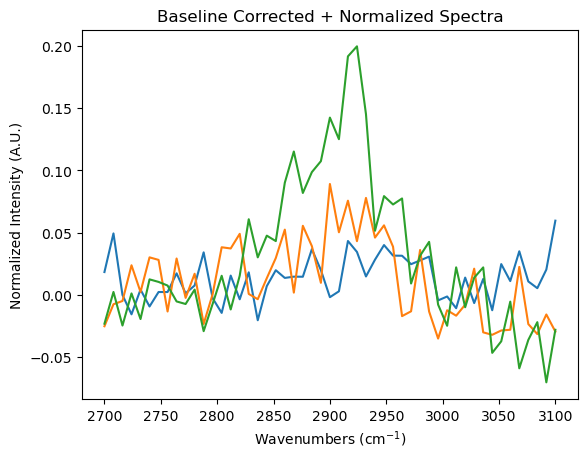

In [6]:
## Visualize random spectra for validation of preprocessing

wavenumbers = np.linspace(data.wn_1, data.wn_2, data.num_samp)
indeces = [random.randint(0,image_vec.shape[0]-1), random.randint(0,image_vec.shape[0]-1), random.randint(0,image_vec.shape[0]-1)]
plt.plot(wavenumbers, image_vec[indeces].T)
plt.title('Baseline Corrected + Normalized Spectra')
plt.xlabel('Wavenumbers (cm$^{-1}$)')
plt.ylabel('Normalized Intensity (A.U.)')

In [3]:
## Optimizing Silhouette Score (OPTIONAL)
kmeans_vec = unsupervised_scripts.K_means_cluster(image_vec[np.random.randint(image_vec.shape[0],size=50000)])
cluster_range = int(input('Enter range of clusters to optimize: '))
kmeans_vec.kmeans_silhoutette_score(cluster_range+1)

__________________________________________________________________________________
init		time	inertia	silhouette
Clusters: 2


python(9681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


PCA-based K-means	0.469s	4032	0.354
Clusters: 3
PCA-based K-means	0.118s	2854	0.239
Clusters: 4
PCA-based K-means	0.056s	2530	0.250
Clusters: 5
PCA-based K-means	0.278s	2252	0.178
Clusters: 6
PCA-based K-means	0.220s	2093	0.180
Clusters: 7
PCA-based K-means	0.274s	2074	0.192
Clusters: 8
PCA-based K-means	0.179s	1931	0.179
Clusters: 9
PCA-based K-means	0.269s	1841	0.171
Clusters: 10
PCA-based K-means	0.163s	1772	0.140
__________________________________________________________________________________


In [ ]:
## Selection of k-means number (default=7)
kmeans_vec = unsupervised_scripts.K_means_cluster(image_vec)
k=int(input('Enter number of k-means centers (Default=7):').strip() or '7')
kmeans_1 = kmeans_vec.kmeans(k)

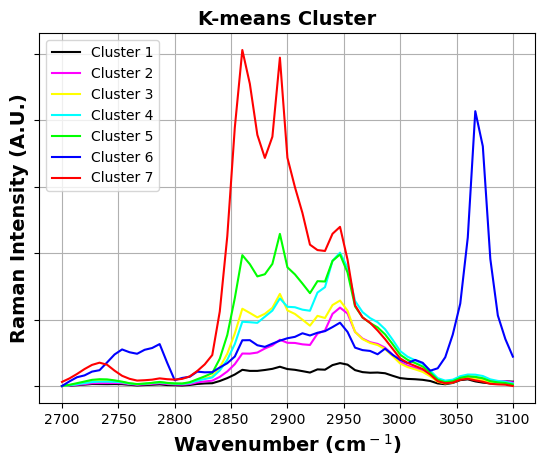

In [5]:
graph_list = ['#000000', '#FF00FF', '#FFFF00', '#00FFFF', '#00FF00','#0000FF','#FF0000', '#008080','#FFA500', '#800080']
color_list = np.empty(k, dtype='object')
color_list[0] = '#000000'
for i in range(1,len(color_list)):
    color_list[i] = (input('Enter hexcode for cluster '+str(i+1)+": ").strip() or graph_list[i])

wavenumbers = np.linspace(data.wn_1, data.wn_2, data.num_samp)
centers = kmeans_vec.kmeans_graph(kmeans_1, wavenumbers, save_input, color_list, save_dir=data.save_dir+os.sep+str(k)+'_Clusters-')

6it [00:00, 11.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


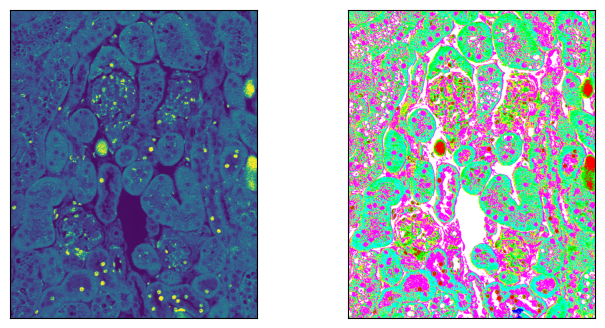

In [6]:
## Visualize Clustered Image
fig_list = ['#FFFFFF', '#FF00FF', '#FFFF00', '#00FFFF', '#00FF00','#0000FF','#FF0000', '#008080','#FFA500', '#800080']
color_list = np.empty(k, dtype='object')
color_list[0] = '#FFFFFF'
for i in range(1,len(color_list)):
    color_list[i] = (input('Enter hexcode for cluster '+str(i+1)+": ").strip() or fig_list[i])
label_idx = kmeans_vec.kmeans_image(kmeans_1, max_img_list, img_dict, save_input, color_list, save_dir=data.save_dir+os.sep+str(k)+'_Clusters-')


In [7]:
## Normalize Spectra
image_norm = np.zeros_like(image_vec)
max_values = np.max(image_vec[label_idx!=0],axis=1)
min_values = np.median(image_vec[label_idx!=0,:data.ch_start], axis=1)
image_norm[label_idx!=0] = processing.normalizebyvalue(image_vec[label_idx!=0], max_val=max_values, min_val=min_values, axis=1)


Text(0, 0.5, 'Normalized Intensity (A.U.)')

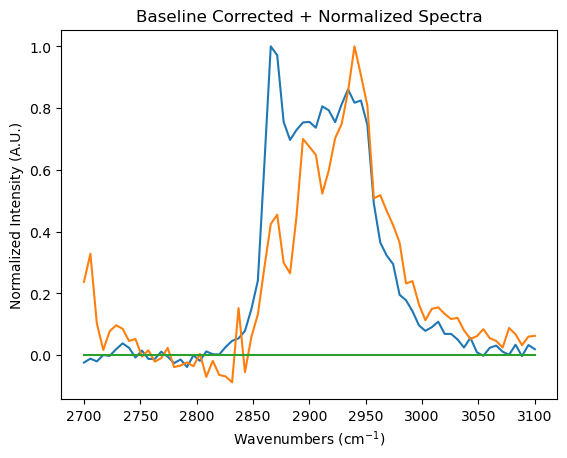

In [8]:
## Visualize random spectra for validation of preprocessing

wavenumbers = np.linspace(data.wn_1, data.wn_2, data.num_samp)
indeces = [random.randint(0,image_norm.shape[0]-1), random.randint(0,image_norm.shape[0]-1), random.randint(0,image_norm.shape[0]-1)]
plt.plot(wavenumbers, image_norm[indeces].T)
plt.title('Baseline Corrected + Normalized Spectra')
plt.xlabel('Wavenumbers (cm$^{-1}$)')
plt.ylabel('Normalized Intensity (A.U.)')

In [9]:
## Optimizing Silhouette Score (OPTIONAL)
kmeans_norm = unsupervised_scripts.K_means_cluster(image_norm[np.random.randint(image_norm.shape[0],size=50000)])
cluster_range = int(input('Enter range of clusters to optimize: '))
kmeans_norm.kmeans_silhoutette_score(cluster_range+1)

__________________________________________________________________________________
init		time	inertia	silhouette
Clusters: 2
PCA-based K-means	0.056s	31901	0.770
Clusters: 3
PCA-based K-means	0.076s	28776	0.639
Clusters: 4
PCA-based K-means	0.094s	16583	0.656
Clusters: 5
PCA-based K-means	0.095s	14984	0.678
Clusters: 6
PCA-based K-means	0.086s	14465	0.682
Clusters: 7
PCA-based K-means	0.198s	12411	0.607
Clusters: 8
PCA-based K-means	0.290s	11666	0.539
Clusters: 9
PCA-based K-means	0.301s	11657	0.584
Clusters: 10
PCA-based K-means	0.296s	11210	0.582
__________________________________________________________________________________


In [10]:
## Selection of k-means number (default=7)
kmeans_norm = unsupervised_scripts.K_means_cluster(image_norm)
k_norm=int(input('Enter number of k-means centers (Default=7):').strip() or '7')
kmeans_2 = kmeans_norm.kmeans(k_norm)

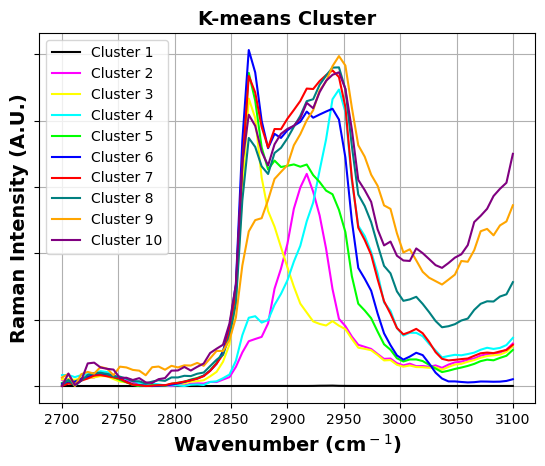

In [11]:
## Visualize Graph of Cluster Centers
graph_list = ['#000000', '#FF00FF', '#FFFF00', '#00FFFF', '#00FF00','#0000FF','#FF0000', '#008080','#FFA500', '#800080']
color_list = np.empty(k_norm, dtype='object')
color_list[0] = '#000000'
for i in range(1,len(color_list)):
    color_list[i] = (input('Enter hexcode for cluster '+str(i+1)+": ").strip() or graph_list[i])

wavenumbers = np.linspace(data.wn_1, data.wn_2, data.num_samp)
_ = kmeans_norm.kmeans_graph(kmeans_2, wavenumbers, save_input, color_list, save_dir=data.save_dir+os.sep+'normalized-'+str(k_norm)+'_Clusters-')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


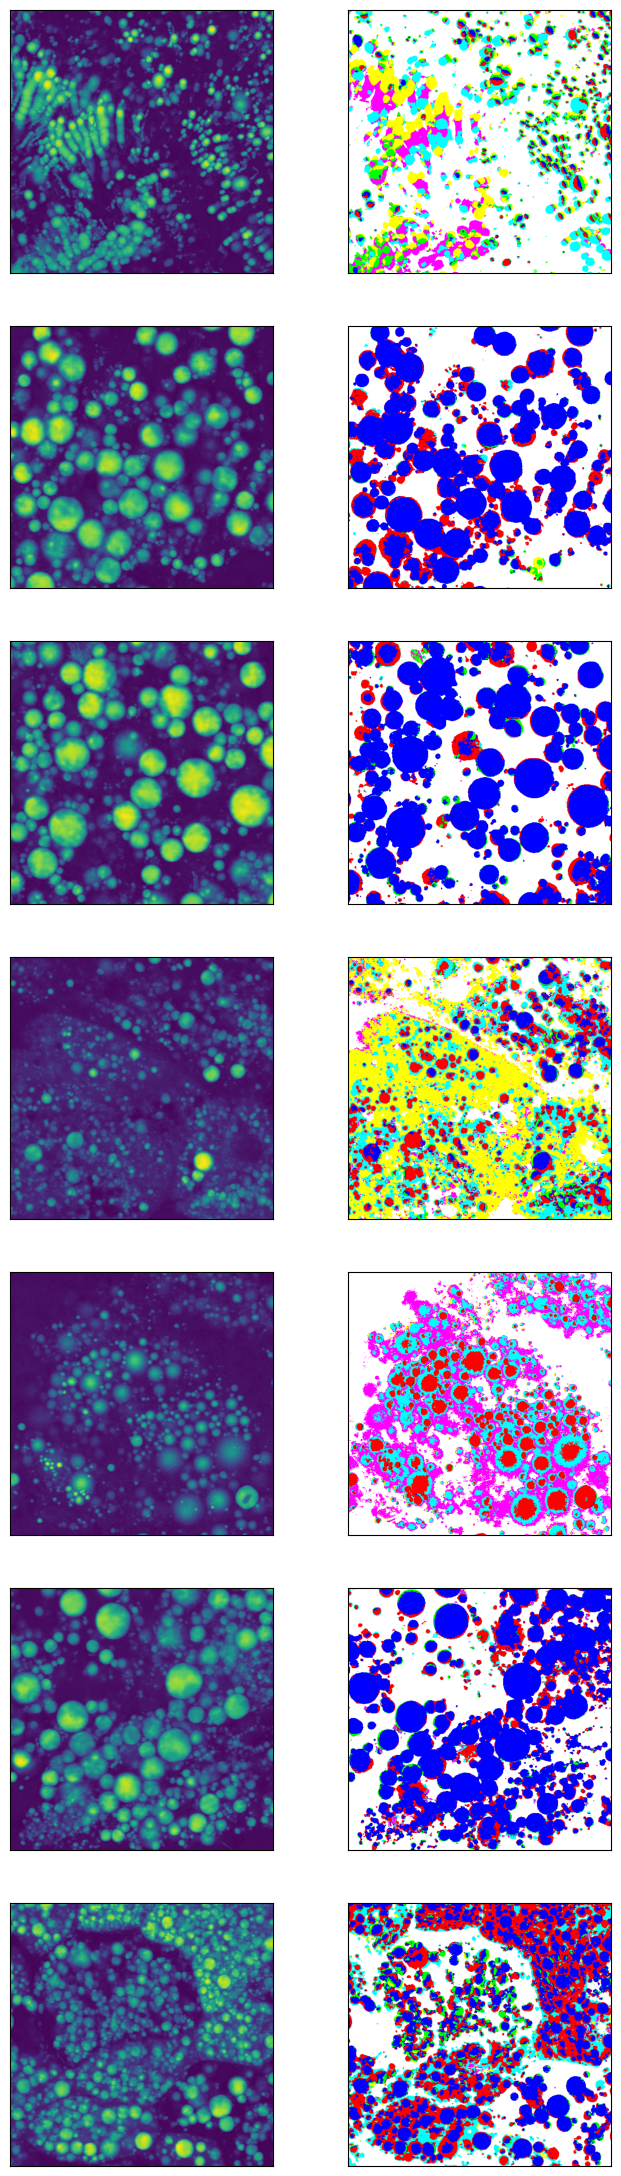

array([0., 0., 0., ..., 0., 0., 0.], shape=(1835008,))

In [12]:
## Visualize Clustered Normalized Spectra
fig_list = ['#FFFFFF', '#FF00FF', '#FFFF00', '#00FFFF', '#00FF00','#0000FF','#FF0000', '#008080','#FFA500', '#800080']
color_list = np.empty(k_norm, dtype='object')
color_list[0] = '#FFFFFF'
for i in range(1,len(color_list)):
    color_list[i] = (input('Enter hexcode for cluster '+str(i+1)+": ").strip() or fig_list[i])
kmeans_norm.kmeans_image(kmeans_2, max_img_list, img_dict,  save_input, fig_list, save_dir=data.save_dir+os.sep+'normalized-'+str(k_norm)+'_Clusters-')